In [102]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'bestsellers.csv'
df = pd.read_csv(file_path)

df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
Чи є в якихось змінних пропуски? Ні

In [103]:
print(df.isna().sum())

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
Які є унікальні жанри? Унікальні жанри: ['Non Fiction' 'Fiction']

In [104]:
unique_genres = df['genre'].unique()
print("Унікальні жанри:", unique_genres)

Унікальні жанри: ['Non Fiction' 'Fiction']


<Axes: title={'center': 'Distribution of Prices'}, ylabel='Frequency'>

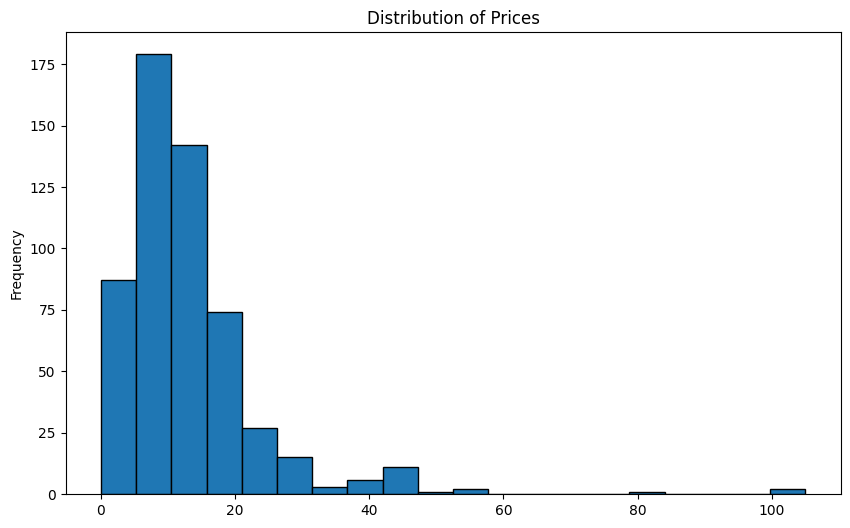

In [105]:
df['price'].plot(kind='hist', bins=20, edgecolor='black', figsize=(10, 6), title='Distribution of Prices')

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
Максимальна ціна? 105
Мінімальна ціна? 0
Середня ціна? 13.1
Медіанна ціна? 11

In [106]:
print(df['price'].max())
print(df['price'].min())
print(df['price'].mean())
print(df['price'].median())

105
0
13.1
11.0


Знайти книгу з найвищим рейтингом
Який рейтинг у датасеті найвищий? Відповідь: Книга з найвищим рейтингом: Brown Bear

In [107]:
max_rating_book = df[df['user_rating'] == df['user_rating'].max()]
print(f"Книга з найвищим рейтингом: {max_rating_book['name'].values[0]}")

Книга з найвищим рейтингом: Brown Bear, Brown Bear, What Do You See?


Знайти кількість книг з максимальним рейтингом
Скільки книг мають такий рейтинг? Відповідь: 52

In [108]:
count_max_rating_books = df[df['user_rating'] == df['user_rating'].max()].shape[0]
print(f"Кількість книг з найвищим рейтингом: {count_max_rating_books}")

Кількість книг з найвищим рейтингом: 52


Знайти книгу з найбільшою кількістю відгуків
Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing

In [109]:
max_reviews_book = df[df['reviews'] == df['reviews'].max()]
print(f"Книга з найбільшою кількістю відгуків: {max_reviews_book['name'].values[0]}")

Книга з найбільшою кількістю відгуків: Where the Crawdads Sing


Знайти найдорожчу книгу серед тих, які потрапили до Топ-50 у 2015 році
З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Publication Manual of the American Psychological Association, 6th Edition

In [110]:
max_price_2015_book = df[(df['year'] == 2015)].sort_values(by='price', ascending=False).head(1)
print(f"Найдорожча книга серед тих, що потрапили до Топ-50 у 2015 році: {max_price_2015_book['name'].values[0]}")

Найдорожча книга серед тих, що потрапили до Топ-50 у 2015 році: Publication Manual of the American Psychological Association, 6th Edition


Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

In [111]:
fiction_2010_count = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]
print(f"Кількість книг жанру Fiction у Топ-50 у 2010 році: {fiction_2010_count}")

Кількість книг жанру Fiction у Топ-50 у 2010 році: 20


Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

In [112]:
high_rating_count_2010_2011 = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))].shape[0]
print(f"Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: {high_rating_count_2010_2011}")

Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: 1


Відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році 

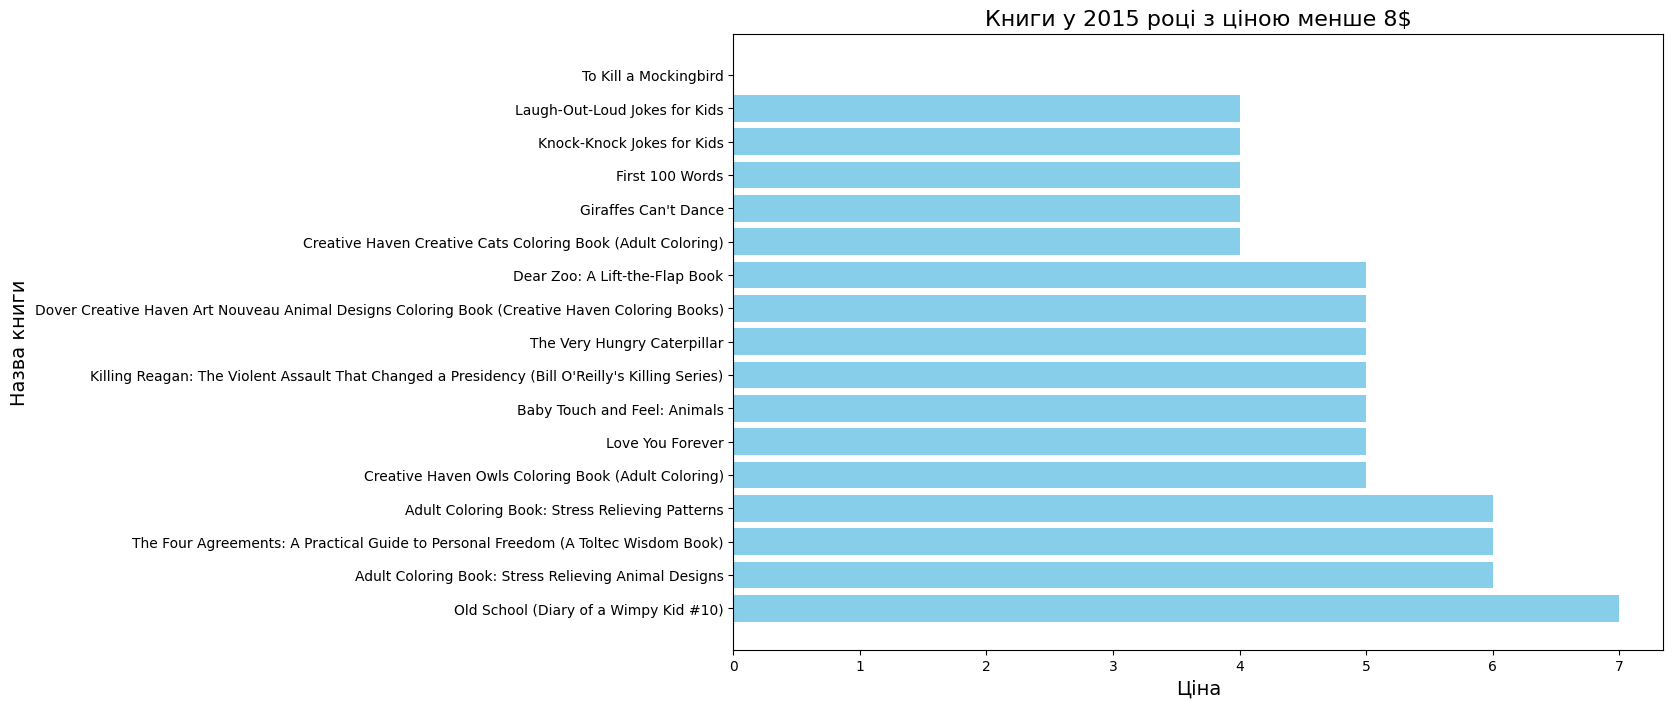

In [113]:
sorted_books_2015 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')

titles = sorted_books_2015['name']
prices = sorted_books_2015['price']

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(titles, prices, color='skyblue')
ax.set_xlabel('Ціна', fontsize=14)
ax.set_ylabel('Назва книги', fontsize=14)
ax.set_title('Книги у 2015 році з ціною менше 8$', fontsize=16)
ax.invert_yaxis()  # To display the highest price at the top

plt.show()

Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)

In [114]:
last_book_2015 = sorted_books_2015.tail(1)
print(f"Остання книга в відсортованому списку: {last_book_2015['name'].values[0]}")

Остання книга в відсортованому списку: Old School (Diary of a Wimpy Kid #10)


Максимальна та мінімальна ціни для кожного з жанрів
Відповіді:
Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction: 0

In [115]:
genre_prices = df.groupby('genre')['price'].agg(['max', 'min'])
print("Максимальна та мінімальна ціна для жанру Fiction:")
print(f"Максимальна: {genre_prices.loc['Fiction', 'max']}")
print(f"Мінімальна: {genre_prices.loc['Fiction', 'min']}")
print("\nМаксимальна та мінімальна ціна для жанру Non Fiction:")
print(f"Максимальна: {genre_prices.loc['Non Fiction', 'max']}")
print(f"Мінімальна: {genre_prices.loc['Non Fiction', 'min']}")

Максимальна та мінімальна ціна для жанру Fiction:
Максимальна: 82
Мінімальна: 0

Максимальна та мінімальна ціна для жанру Non Fiction:
Максимальна: 105
Мінімальна: 0


Кількість книг для кожного автора та автор з найбільшою кількістю книг
Відповіді:
Якої розмірності вийшла таблиця? Відповідь: (248, 2)
Який автор має найбільше книг? Відповідь: Jeff Kinney
Скільки книг цього автора? Відповідь: 12

In [116]:
author_books_count = df.groupby('author')['name'].count().reset_index(name='books_count')
max_books_author = author_books_count.loc[author_books_count['books_count'].idxmax()]
print("Розмірність таблиці:")
print(author_books_count.shape)
print("\nАвтор з найбільшою кількістю книг:")
print(f"Автор: {max_books_author['author']}")
print(f"Кількість книг: {max_books_author['books_count']}")

Розмірність таблиці:
(248, 2)

Автор з найбільшою кількістю книг:
Автор: Jeff Kinney
Кількість книг: 12


Середній рейтинг для кожного автора, автор з найменшим середнім рейтингом та його рейтинг
Відповіді:
У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
Який у цього автора середній рейтинг? Відповідь: 3.9

In [117]:
author_avg_rating = df.groupby('author')['user_rating'].mean().reset_index(name='avg_rating')
min_avg_rating_author = author_avg_rating.loc[author_avg_rating['avg_rating'].idxmin()]
print("У якого автора середній рейтинг мінімальний:")
print(f"Автор: {min_avg_rating_author['author']}")
print(f"Середній рейтинг: {min_avg_rating_author['avg_rating']}")

table_data = {'Автор': authors, 'Середній рейтинг': avg_ratings}
table_df = pd.DataFrame(table_data)

print(authors)
print(avg_ratings)

# Виведення таблиці
display(table_df)

У якого автора середній рейтинг мінімальний:
Автор: Donna Tartt
Середній рейтинг: 3.9
0                Abraham Verghese
1                  Adam Gasiewski
2                   Adam Mansbach
3                       Adir Levy
4      Admiral William H. McRaven
                  ...            
243               Walter Isaacson
244                 William Davis
245              William P. Young
246              Wizards RPG Team
247                  Zhi Gang Sha
Name: author, Length: 248, dtype: object
0      4.600000
1      4.400000
2      4.800000
3      4.800000
4      4.700000
         ...   
243    4.566667
244    4.400000
245    4.600000
246    4.800000
247    4.600000
Name: avg_rating, Length: 248, dtype: float64


,Автор,Середній рейтинг
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000


З'єднання двох датафреймів та їх сортування
Відповіді:
Який автор перший у списку? Відповідь: Muriel Barbery

In [118]:
merged_df = pd.concat([author_books_count, author_avg_rating['avg_rating']], axis=1)
sorted_merged_df = merged_df.sort_values(by=['books_count', 'avg_rating'], ascending=[True, True])
print("Автор перший у списку:")
print(sorted_merged_df.iloc[0])

Автор перший у списку:
author         Muriel Barbery
books_count                 1
avg_rating                4.0
Name: 171, dtype: object
